# Importing Necessary Libraries

In [2]:
#Importing basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [3]:
#Importing for preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
#Importing the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
#Importing metrics for evaulation
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score

In [6]:
# To deal w warning
import warnings
warnings.filterwarnings('ignore')

# Importing the Kaggle Dataset

In [7]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')

# Exploritary Data Analysis

In [8]:
df.shape

(2126, 22)

In [9]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [10]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [13]:
df['fetal_health'] = df['fetal_health'].astype(int)

In [14]:
df['fetal_health'].value_counts().sum

<bound method Series.sum of fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64>

In [15]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# Visualizing Data

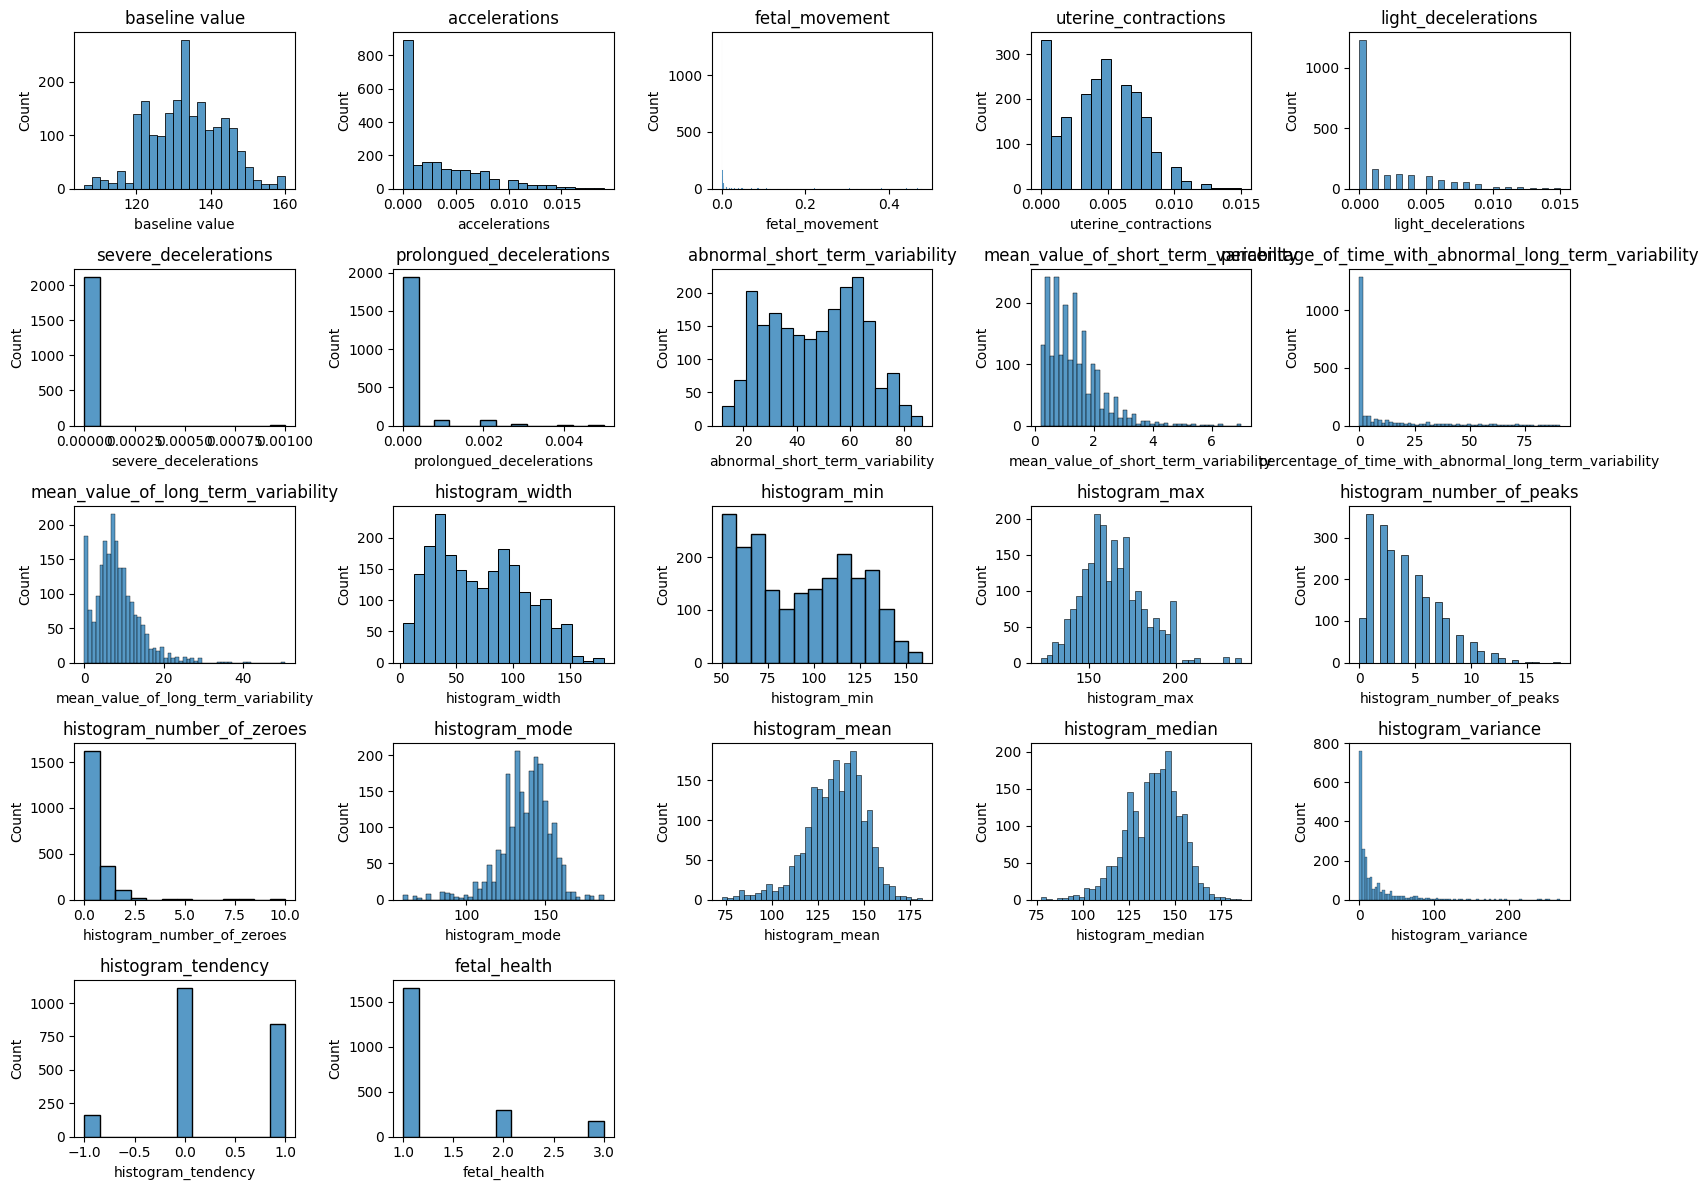

In [16]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[column], kde=False,)
    plt.title(column)
plt.tight_layout()
plt.show()

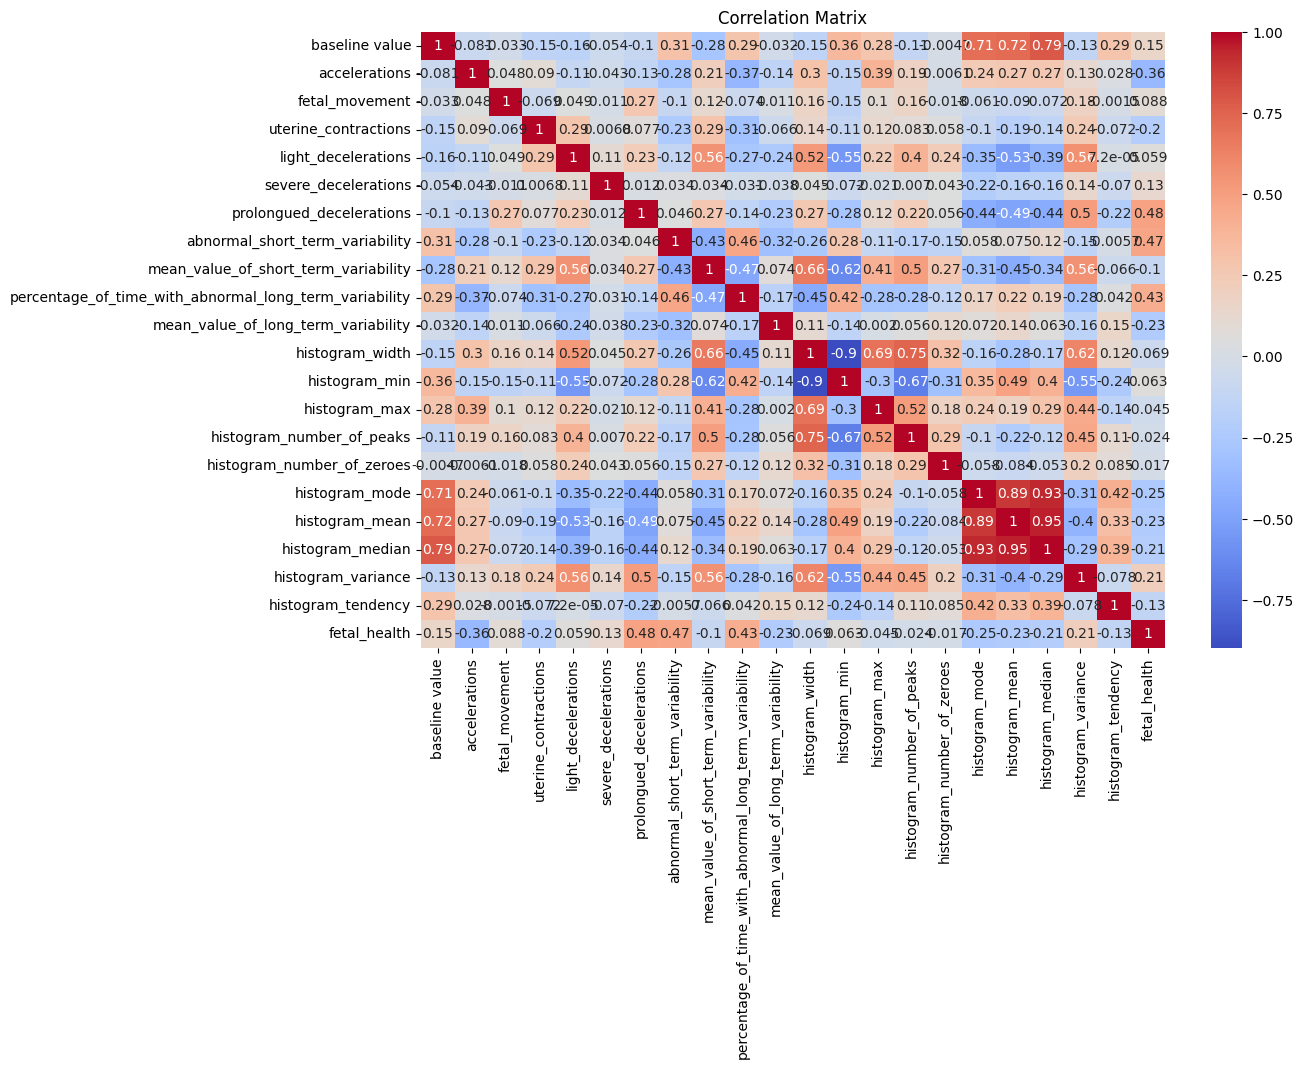

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

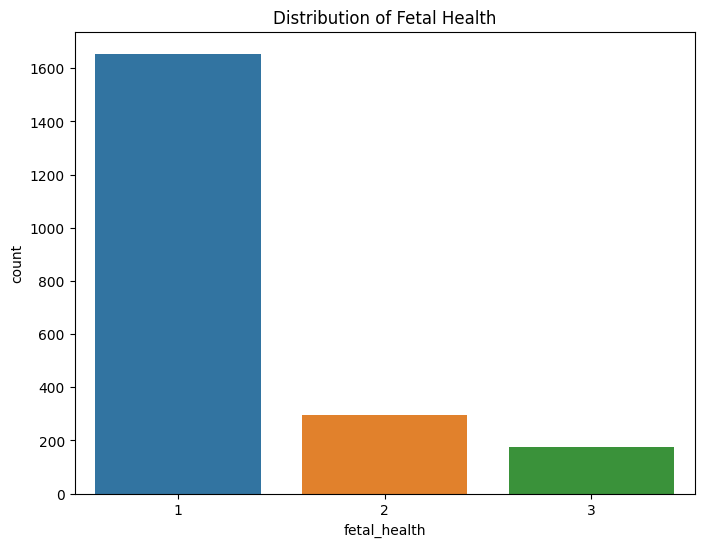

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=df)
plt.title('Distribution of Fetal Health')
plt.show()

In [19]:
# Separating features and target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Standardizing the features
scaler = StandardScaler()
X_1 = scaler.fit_transform(X)

In [20]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [21]:
y.head()

0    2
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int64

# Splitting the data into training and testing

In [22]:
X_1train, X_1test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=1, stratify=y) 

print("Training test size:", X_1train.shape)
print("Testing test size:", X_1test.shape)

Training test size: (1700, 21)
Testing test size: (426, 21)


# Building ML models with the following:
1. Logistin Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting

**LOGISTIC REGRESSION**

In [23]:
#Train the model
model1 = LogisticRegression (random_state=1, max_iter=2000)
model1.fit(X_1train, y_train)   # Used standardized data with StandardScaler

# Make predictions 
y_pred1 = model1.predict(X_1test)

In [24]:
# Evaulating predictions
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred1))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred1))

# Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae1}")

mse1 = mean_squared_error(y_test, y_pred1)
print(f"Mean Squared Error (MSE): {mse1}")

rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error (RMSE): {rmse1}")

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.95      0.96      0.95       332
           2       0.75      0.69      0.72        59
           3       0.82      0.80      0.81        35

    accuracy                           0.91       426
   macro avg       0.84      0.82      0.83       426
weighted avg       0.91      0.91      0.91       426

Confusion Matrix
[[319  10   3]
 [ 15  41   3]
 [  3   4  28]]
Mean Absolute Error (MAE): 0.10328638497652583
Mean Squared Error (MSE): 0.13145539906103287
Root Mean Squared Error (RMSE): 0.36256778547056945


In [25]:
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape1 = mean_absolute_percentage_error(y_test, y_pred1)
print(f"Mean Absolute Percentage Error (MAPE): {mape1}")

Mean Absolute Percentage Error (MAPE): 6.651017214397497


In [26]:
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy", round(acc1*100,2), "%")

Accuracy 91.08 %


**The LogisticRegression model produced 91.08% accuracy with 6.65% MAPE.**

**DECISION TREE**

In [27]:
# Train the model
model2 = DecisionTreeClassifier(random_state = 1 )
model2.fit(X_train, y_train)

# making predictions with the model
y_pred2 = model2.predict(X_test)

In [28]:
#Train the model
model2 = DecisionTreeClassifier(random_state = 1 )
model2.fit(X_train, y_train)

# making predictions with the model
y_pred2 = model2.predict(X_test)

# Evaulating predictions
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred2))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred2))

# Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae2}")

#Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error (MSE): {mse2}")

#Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error (RMSE): {rmse2}")

Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       332
           2       0.73      0.75      0.74        59
           3       0.97      0.94      0.96        35

    accuracy                           0.92       426
   macro avg       0.88      0.88      0.88       426
weighted avg       0.92      0.92      0.92       426

Confusion Matrix
[[315  16   1]
 [ 15  44   0]
 [  2   0  33]]
Mean Absolute Error (MAE): 0.08685446009389672
Mean Squared Error (MSE): 0.10093896713615023
Root Mean Squared Error (RMSE): 0.3177089346180718


In [29]:
# Mean Absolute Percentage Error (MAPE)
mape2 = mean_absolute_percentage_error(y_test, y_pred2)
print(f"Mean Absolute Percentage Error (MAPE): {mape2}")

Mean Absolute Percentage Error (MAPE): 6.298904538341158


In [30]:
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy", round(acc2*100,2), "%")

Accuracy 92.02 %


**The DecisionTreeClassifier model produced 92.02% accuracy with 6.30% MAPE.**

**RANDOM FOREST**

In [31]:
#Train model
model3 = RandomForestClassifier(random_state = 1)
model3.fit(X_train, y_train)

# Making predicitons w/ the model
y_pred3 = model3.predict(X_test)

In [32]:
# Evaulating predictions
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred3))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred3))

# Mean Absolute Error (MAE)
mae3 = mean_absolute_error(y_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae3}")

#Mean Squared Error (MSE)
mse3 = mean_squared_error(y_test, y_pred3)
print(f"Mean Squared Error (MSE): {mse3}")

#Root Mean Squared Error (RMSE)
rmse3 = np.sqrt(mse3)
print(f"Root Mean Squared Error (RMSE): {rmse3}")

Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       332
           2       0.96      0.76      0.85        59
           3       0.97      0.97      0.97        35

    accuracy                           0.96       426
   macro avg       0.96      0.91      0.93       426
weighted avg       0.96      0.96      0.96       426

Confusion Matrix
[[329   2   1]
 [ 14  45   0]
 [  1   0  34]]
Mean Absolute Error (MAE): 0.046948356807511735
Mean Squared Error (MSE): 0.056338028169014086
Root Mean Squared Error (RMSE): 0.23735633163877068


In [33]:
# Mean Absolute Percentage Error (MAPE)
mape3 = mean_absolute_percentage_error(y_test, y_pred3)
print(f"Mean Absolute Percentage Error (MAPE): {mape3}")

Mean Absolute Percentage Error (MAPE): 2.7386541471048513


In [34]:
acc3 = accuracy_score(y_test, y_pred3)
print("Accuracy", round(acc3*100,2), "%")

Accuracy 95.77 %


**The RandomForestClassifier model produced 95.77% accuracy with 2.74% MAPE.**

**GRADIENT BOOSTING**

In [35]:
# Train the model
model4 = GradientBoostingClassifier (random_state = 69)
model4.fit(X_train, y_train)

# Making predicitons w/ the model
y_pred4 = model4.predict(X_test)

In [36]:
# Evaulating predictions
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred4))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred4))

# Mean Absolute Error (MAE)
mae4 = mean_absolute_error(y_test, y_pred4)
print(f"Mean Absolute Error (MAE): {mae4}")

#Mean Squared Error (MSE)
mse4 = mean_squared_error(y_test, y_pred4)
print(f"Mean Squared Error (MSE): {mse4}")

#Root Mean Squared Error (RMSE)
rmse4 = np.sqrt(mse4)
print(f"Root Mean Squared Error (RMSE): {rmse4}")

Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       332
           2       0.94      0.78      0.85        59
           3       0.97      0.94      0.96        35

    accuracy                           0.96       426
   macro avg       0.96      0.90      0.93       426
weighted avg       0.96      0.96      0.95       426

Confusion Matrix
[[328   3   1]
 [ 13  46   0]
 [  2   0  33]]
Mean Absolute Error (MAE): 0.051643192488262914
Mean Squared Error (MSE): 0.06572769953051644
Root Mean Squared Error (RMSE): 0.2563741397460291


In [37]:
# Mean Absolute Percentage Error (MAPE)
mape4 = mean_absolute_percentage_error(y_test, y_pred4)
print(f"Mean Absolute Percentage Error (MAPE): {mape4}")

Mean Absolute Percentage Error (MAPE): 3.012519561815336


In [38]:
acc4 = accuracy_score(y_test, y_pred4)
print("Accuracy", round(acc4*100,2), "%")

Accuracy 95.54 %


**The GradientBoostingClassifier model produced 95.54% accuracy with 3.01% MAPE.**

# Visualizing the performances of the models

In [39]:
# Creating a hover bar graph
model_names = ['model1', 'model2', 'model3', 'model4']
accuracies = [acc1, acc2, acc3, acc4]

# Create a bar plot with tooltips
fig = go.Figure(data=[
    go.Bar(x=model_names, y=accuracies, marker_color='skyblue',
           hovertemplate='Model: %{x}<br>Accuracy: %{y:.2f}<extra></extra>')
])

# Customize layout
fig.update_layout(title='Model Performance Comparison',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  xaxis=dict(tickangle=45),
                  yaxis=dict(range=[0.84,1.0]),  
                  plot_bgcolor='rgba(0,0,0,0)',
                  width=600,
                  height=600)

# Show plot
fig.show()